#### 1.문제 정의 
- 보스턴 집값 예측 
- 지도학습/ 회귀

#### 2. 데이터 수집

In [1]:
from sklearn.datasets import load_boston
dataset=load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- CRIM  : 지역별 1인당 범죄률
- ZN : 25000평방비트를 초과하는 거주지역의 비율
- INDUS   : 비소매상업지역이 차지하는 면적비율
- CHAS  :찰수강 위치변수
-  NOX  : 일산화질소 농도
-  RM   집의 평균 방수
-  AGE    1940년이전에 지어진 비율
-  DIS   5가지 보스턴시 고용 시설까지 거리
-  RAD   순환도로의 접근 용이성
-  TAX    10000달러당 재산 세율
-  PTRATIO 지역별 학생과 교수 비율 
-  B       지역별 흑인 비율
-  LSTAT   급여가 낮은 직업에 종사하는 인구 비율
-  MEDV   : 가격 


#### 데이터 전처리

In [3]:
import pandas as pd

C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
X=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [6]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [7]:
y=pd.Series(dataset.target, name="price")

In [8]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: price, dtype: float64

In [9]:
print(y.shape)

(506,)


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


#### 4. EDA(Exploratory Data Analysis)

In [11]:
house=pd.concat([X,y],axis=1)

In [12]:
print(house.shape)

(506, 14)


In [14]:
house.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [15]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


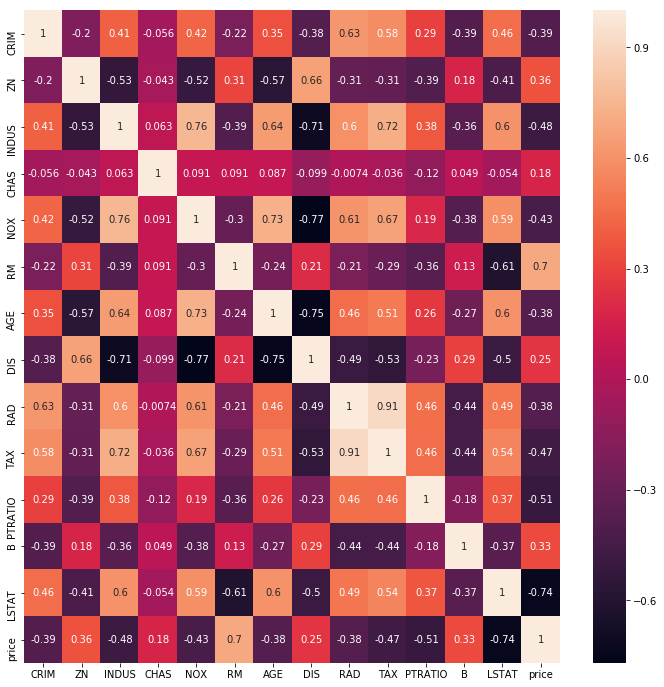

In [16]:
plt.figure(figsize=(12,12))
sb.heatmap(house.corr(),annot=True)

#### 5. 모델 선택 (Knn) ,학습 , 평가

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test, y_train, y_test=train_test_split(X,y , test_size=0.3, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
for k in range(1,30):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    print("k:{}, R^2:{:.3f}".format(k,knn.score(X_test,y_test)))
# 분류에서는 정확도 , 회귀에서는 R^2(결정계수) 
# 결정계수는 선형모형이 주어진 자료에 적합한 정도를 재는 척도 
# 0 <= R^2 <= 1 1에 가까울수록 회귀식이 적합도가 높아짐 

k:1, R^2:0.331
k:2, R^2:0.495
k:3, R^2:0.555
k:4, R^2:0.541
k:5, R^2:0.517
k:6, R^2:0.487
k:7, R^2:0.473
k:8, R^2:0.458
k:9, R^2:0.477
k:10, R^2:0.460
k:11, R^2:0.468
k:12, R^2:0.450
k:13, R^2:0.448
k:14, R^2:0.425
k:15, R^2:0.414
k:16, R^2:0.402
k:17, R^2:0.387
k:18, R^2:0.379
k:19, R^2:0.379
k:20, R^2:0.379
k:21, R^2:0.374
k:22, R^2:0.368
k:23, R^2:0.355
k:24, R^2:0.347
k:25, R^2:0.344
k:26, R^2:0.336
k:27, R^2:0.327
k:28, R^2:0.322
k:29, R^2:0.314


In [24]:
train_acc=[]
test_acc=[]
for k in range(1,30):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

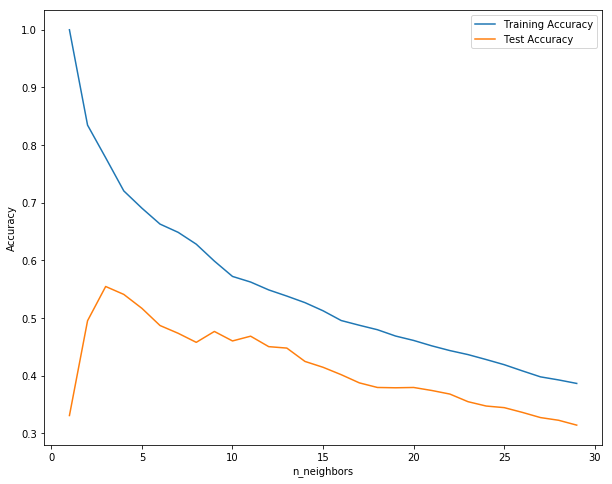

In [75]:
plt.figure(figsize=(10,8))
plt.plot(range(1,30),train_acc,label="Training Accuracy")
plt.plot(range(1,30),test_acc,label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [76]:
# k가 3일때 결정계수가 가장높았음 
# knn은 거리로 판단하기 때문에 표준 스케일링 필요함

### 표준스케일링

In [79]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [82]:
train_acc=[]
test_acc=[]
for k in range(1,30):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_sc,y_train)
    train_acc.append(knn.score(X_train_sc,y_train))
    test_acc.append(knn.score(X_test_sc,y_test))

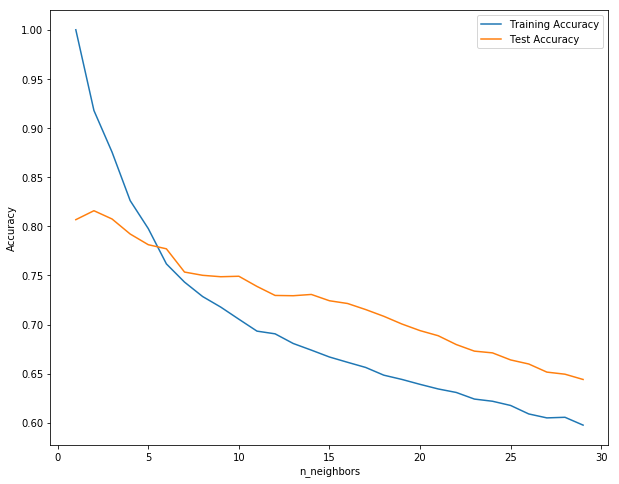

In [83]:
plt.figure(figsize=(10,8))
plt.plot(range(1,30),train_acc,label="Training Accuracy")
plt.plot(range(1,30),test_acc,label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [90]:
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_sc,y_train)
knn.score(X_test_sc,y_test)

0.8158397654513341

In [91]:
# k가 2일때 결정계수가 가장 높음
# knn은 회귀에 성능이 안좋음
# 너무 단순한 모델이라 잘 쓰지않음 , 입문자들에게 이해시키기 적합한 모델

### 5. 모델 선택(LinearRegression ), 학습 , 평가

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
print("계수:{}".format(lr.coef_))
print("절편:{}".format(lr.intercept_))

계수:[-1.15159695e+02  1.22036734e+01 -8.32034925e+01  1.35056614e+01
  8.68911900e+00  9.85951537e+01  4.55118920e+01 -5.43553789e+01
  1.73993000e+01  4.43562923e+01  4.77875223e+00  3.60142061e+01
  3.77959935e+01  4.53333913e+01  4.87510926e+02  3.61669804e+02
  2.06288646e+02 -8.83316581e+01  1.41465114e+02 -7.51000824e+01
 -5.89065728e+01  1.64788437e+02 -5.74528748e+02  2.61325094e+02
  2.32227340e-01  8.83948006e+01 -5.82544931e+00 -1.43928200e+01
 -1.40435439e+01 -8.89748425e+01  7.21427647e+00  7.50057115e+00
 -2.41411953e+01  6.89116731e+00  3.05879293e+01  6.60209027e+00
  1.82146806e+00 -2.43432529e+01  2.28084546e+01 -7.90021395e+00
  4.18106458e+01  3.34327414e+01  1.07049737e+01  6.09478282e+01
 -1.38286653e+01  2.07977202e+01  1.25368107e+01  1.51268273e+01
 -1.53234934e+01  1.35056614e+01 -2.49703170e+01 -2.88322418e+01
  1.73446528e-01  1.59387618e+01 -1.69530043e+01  3.11860417e+01
 -1.42752027e+01  2.66296239e+00 -9.31428439e+00 -1.50149560e+01
  1.79228818e+01 -2.52

In [95]:
print("훈련 세트 점수 :{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(lr.score(X_test,y_test)))


훈련 세트 점수 :0.93
테스트 세트 점수 :0.80


In [96]:
from sklearn.linear_model import Ridge

In [97]:
alpha_list=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in alpha_list:
    ridge=Ridge(alpha=i )
    ridge.fit(X_train,y_train)
    print("alpha:{}".format(i))
    print("훈련 세트 점수 :{:.2f}".format(ridge.score(X_train,y_train)))
    print("테스트 세트 점수 :{:.2f}".format(ridge.score(X_test,y_test)))

alpha:0.0001
훈련 세트 점수 :0.93
테스트 세트 점수 :0.81
alpha:0.001
훈련 세트 점수 :0.93
테스트 세트 점수 :0.84
alpha:0.01
훈련 세트 점수 :0.92
테스트 세트 점수 :0.90
alpha:0.1
훈련 세트 점수 :0.89
테스트 세트 점수 :0.92
alpha:1
훈련 세트 점수 :0.84
테스트 세트 점수 :0.88
alpha:10
훈련 세트 점수 :0.73
테스트 세트 점수 :0.78
alpha:100
훈련 세트 점수 :0.53
테스트 세트 점수 :0.53
alpha:1000
훈련 세트 점수 :0.24
테스트 세트 점수 :0.22
alpha:10000
훈련 세트 점수 :0.04
테스트 세트 점수 :0.04


In [98]:
from sklearn.linear_model import Lasso

In [99]:
alpha_list=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in alpha_list:
    lasso=Lasso(alpha=i )
    lasso.fit(X_train,y_train)
    print("alpha:{}".format(i))
    print("훈련 세트 점수 :{:.2f}".format(lasso.score(X_train,y_train)))
    print("테스트 세트 점수 :{:.2f}".format(lasso.score(X_test,y_test)))

alpha:0.0001
훈련 세트 점수 :0.92
테스트 세트 점수 :0.86
alpha:0.001
훈련 세트 점수 :0.91
테스트 세트 점수 :0.90
alpha:0.01
훈련 세트 점수 :0.86
테스트 세트 점수 :0.91
alpha:0.1
훈련 세트 점수 :0.70
테스트 세트 점수 :0.78
alpha:1
훈련 세트 점수 :0.25
테스트 세트 점수 :0.22
alpha:10
훈련 세트 점수 :0.00
테스트 세트 점수 :-0.00
alpha:100
훈련 세트 점수 :0.00
테스트 세트 점수 :-0.00
alpha:1000
훈련 세트 점수 :0.00
테스트 세트 점수 :-0.00
alpha:10000
훈련 세트 점수 :0.00
테스트 세트 점수 :-0.00


C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sjsim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [100]:
from sklearn.model_selection import cross_val_score

In [103]:
alpha_list=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in alpha_list:
    ridge=Ridge(alpha=i )
    score=cross_val_score(ridge, X_train,y_train,cv=5).mean()
    print("alpha:{}".format(i))
    print("교차검증 점수 :{:.2f}".format(score))  

alpha:0.0001
교차검증 점수 :0.81
alpha:0.001
교차검증 점수 :0.83
alpha:0.01
교차검증 점수 :0.82
alpha:0.1
교차검증 점수 :0.81
alpha:1
교차검증 점수 :0.78
alpha:10
교차검증 점수 :0.68
alpha:100
교차검증 점수 :0.47
alpha:1000
교차검증 점수 :0.19
alpha:10000
교차검증 점수 :0.02


In [104]:
ridge=Ridge(alpha=0.001)
ridge.fit(X_train,y_train)
print("훈련 세트 점수 :{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 :{:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수 :0.93
테스트 세트 점수 :0.84
